# 曾正豪 0716325

In [1]:
import csv
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.utils import shuffle
from scipy.sparse import coo_matrix
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
x = []
x_setosa = []
x_versicolor = []
x_virginica = []
y = []
data_freq = []
data_freq_setosa = []
data_freq_versicolor = []
data_freq_virginica = []

for idx in range(4):
    data_freq.append({0:0, 1:0, 2:0, 3:0, 4:0})
    data_freq_setosa.append({0:0, 1:0, 2:0, 3:0, 4:0})
    data_freq_versicolor.append({0:0, 1:0, 2:0, 3:0, 4:0})
    data_freq_virginica.append({0:0, 1:0, 2:0, 3:0, 4:0})

with open('iris.data', newline='') as csvfile:
    rows = csv.reader(csvfile)
    for row in rows:
        y.append(row[-1])
        x.append(row[:-1])
            
        if y[-1] == 'Iris-setosa':
            x_setosa.append(row[:-1])
        if y[-1] == 'Iris-versicolor':
            x_versicolor.append(row[:-1])
        if y[-1] == 'Iris-virginica':
            x_virginica.append(row[:-1])

x = np.array(x).astype(float)
y = np.array(y)

X_sparse = coo_matrix(x)
x, X_sparse, y = shuffle(x, X_sparse, y, random_state=0)


# Data Input & Data Preprocessing

## Data Input
    這邊由於dataset檔案內容符合csv格式，所以我這邊使用了csv這個module來去讀取dataset，並且我使用了data_freq、data_freq_setosa、data_freq_versicolor、data_freq_virginica這四個變數來儲存每一個feature在不同label下的出現頻率

## Data Preprocessing

### Drop features with any missing value.
    這邊因為沒有missing value，所以不需要drop
### Transform data format and shape so your model can process them.
    使用了np.array()將其轉變為numpy array形式，並且使用float型別儲存
### Shuffle the data.
    這邊使用了sklearn.utils裡面的shuffle函示來打亂

1-th feature's 𝜇 and 𝜎:
𝜇 of all is: 5.843333333333334 , 𝜎 of all is: 0.8253012917851409
𝜇 of setosa is: 5.006 , 𝜎 of setosa is: 0.3489469873777391
𝜇 of versicolor is: 5.936 , 𝜎 of versicolor is: 0.5109833656783751
𝜇 of virginica is: 6.587999999999999 , 𝜎 of virginica is: 0.6294886813914926


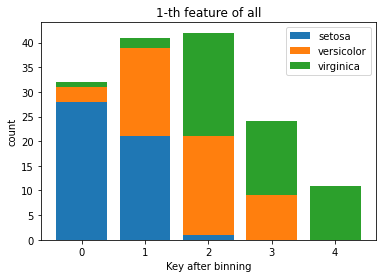

2-th feature's 𝜇 and 𝜎:
𝜇 of all is: 3.054 , 𝜎 of all is: 0.43214658007054346
𝜇 of setosa is: 3.4179999999999997 , 𝜎 of setosa is: 0.37719490982779713
𝜇 of versicolor is: 2.77 , 𝜎 of versicolor is: 0.31064449134018135
𝜇 of virginica is: 2.974 , 𝜎 of virginica is: 0.31925538366643086


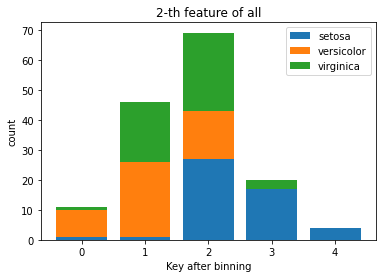

3-th feature's 𝜇 and 𝜎:
𝜇 of all is: 3.758666666666666 , 𝜎 of all is: 1.7585291834055212
𝜇 of setosa is: 1.4640000000000004 , 𝜎 of setosa is: 0.17176728442867112
𝜇 of versicolor is: 4.26 , 𝜎 of versicolor is: 0.4651881339845203
𝜇 of virginica is: 5.5520000000000005 , 𝜎 of virginica is: 0.546347874526844


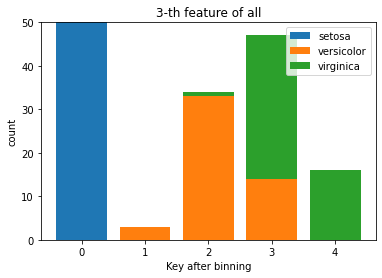

4-th feature's 𝜇 and 𝜎:
𝜇 of all is: 1.1986666666666668 , 𝜎 of all is: 0.7606126185881716
𝜇 of setosa is: 0.244 , 𝜎 of setosa is: 0.10613199329137278
𝜇 of versicolor is: 1.3259999999999998 , 𝜎 of versicolor is: 0.19576516544063705
𝜇 of virginica is: 2.0260000000000002 , 𝜎 of virginica is: 0.2718896835115301


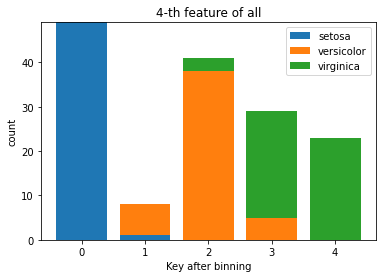

In [3]:
est = KBinsDiscretizer(n_bins = 5, encode = 'ordinal', strategy = 'uniform')
est.fit(x)
Xt = est.transform(x)
Xt_setosa = est.transform(x_setosa)
Xt_versicolor = est.transform(x_versicolor)
Xt_virginica = est.transform(x_virginica)

for idx in range(4):
    x_f = []
    x_f_setosa = []
    x_f_versicolor = []
    x_f_virginica = []

    for i in range(len(x)):
        x_f.append(x[i][idx])
        if y[i] == 'Iris-setosa':
            x_f_setosa.append(x[i][idx])
        if y[i] == 'Iris-versicolor':
            x_f_versicolor.append(x[i][idx])
        if y[i] == 'Iris-virginica':
            x_f_virginica.append(x[i][idx])
    
    print (str(idx+1) + '-th feature\'s 𝜇 and 𝜎:')
    print('𝜇 of all is:', np.average(x_f), ', 𝜎 of all is:', np.var(x_f) ** 0.5)
    print('𝜇 of setosa is:', np.average(x_f_setosa), ', 𝜎 of setosa is:', np.var(x_f_setosa) ** 0.5)
    print('𝜇 of versicolor is:', np.average(x_f_versicolor), ', 𝜎 of versicolor is:', np.var(x_f_versicolor) ** 0.5)
    print('𝜇 of virginica is:', np.average(x_f_virginica), ', 𝜎 of virginica is:', np.var(x_f_virginica) ** 0.5)


    for i in Xt:
        data_freq[idx][i[idx]] += 1
    for i in Xt_setosa:
        data_freq_setosa[idx][i[idx]] += 1
    for i in Xt_versicolor:
        data_freq_versicolor[idx][i[idx]] += 1
    for i in Xt_virginica:
        data_freq_virginica[idx][i[idx]] += 1

    tolist = data_freq[idx].items()
    tolist = sorted(tolist)

    tolist_setosa = data_freq_setosa[idx].items()
    tolist_setosa = sorted(tolist_setosa)

    tolist_versicolor = data_freq_versicolor[idx].items()
    tolist_versicolor = sorted(tolist_versicolor)

    tolist_virginica = data_freq_virginica[idx].items()
    tolist_virginica = sorted(tolist_virginica)


    i, j = zip(*tolist) 
    i_setosa, j_setosa = zip(*tolist_setosa) 
    i_versicolor, j_versicolor = zip(*tolist_versicolor) 
    i_virginica, j_virginica = zip(*tolist_virginica) 

    plt.title(str(idx+1) + '-th feature of all')
    plt.xlabel('Key after binning')
    plt.ylabel('count')

    plt.bar(i_setosa, j_setosa, label='setosa')
    plt.bar(i_versicolor, j_versicolor, label='versicolor', bottom=np.array(j_setosa))
    plt.bar(i_virginica, j_virginica, label='virginica', bottom=np.array(j_versicolor) + np.array(j_setosa))
    plt.legend()
    plt.show()

# Data Visualization
    這邊我將三種label的各個feature分布，先使用sklearn.preprocessing的KBinsDiscretizer進行binning操作分成5類，然後再用直方圖畫出。並且計算各feature的平均以及標準差。

# Model Construction & Train-Test-Split & Results


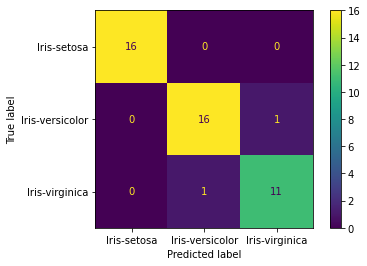

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.94      0.94      0.94        17
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



In [4]:
without_laplace = GaussianNB()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=777)
without_laplace.fit(X_train, y_train)
y_pred = without_laplace.predict(X_test)

CM = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=without_laplace.classes_).plot()
plt.show()
print(report)

## Holdout validation
### Model Construction
    這邊我使用了sklearn.naive_bayes裡面的GaussianNB
### Train-Test-Split
    接著我使用sklearn.model_selection的train_test_split來將dataset以7:3的比例分為訓練集和測試集。並使用model的fit函數去訓練訓練集，predict函數去預測測試集。
### Results 
    使用sklearn.metrics的confusion_matrix去自動生成Confusion matrix，並且使用ConfusionMatrixDisplay印出。接著使用sklearn.metrics的classification_report去將測試集預測結果的分析資料印出

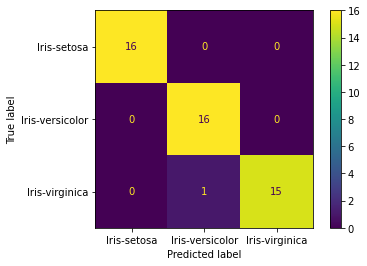

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.92      0.96      0.94        50
 Iris-virginica       0.96      0.92      0.94        50

       accuracy                           0.96       150
      macro avg       0.96      0.96      0.96       150
   weighted avg       0.96      0.96      0.96       150



In [5]:
kf = KFold(n_splits=3)
kf.get_n_splits(x)
without_laplace = GaussianNB()

true_class = []
pred_class = []
CM_list = np.zeros((3,3)).astype(int)

for train_index, test_index in kf.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    without_laplace.fit(X_train, y_train)
    y_pred = without_laplace.predict(X_test)

    true_class.extend(y_test)
    pred_class.extend(y_pred)

    CM = confusion_matrix(y_test, y_pred, labels=without_laplace.classes_)
    CM_list += CM
    
CM_list = CM_list // 3
report = classification_report(true_class, pred_class)
ConfusionMatrixDisplay(confusion_matrix=CM_list, display_labels=without_laplace.classes_).plot()
plt.show()
print(report)

## Holdout validation
### Model Construction
    這邊我使用了sklearn.naive_bayes裡面的GaussianNB
### Train-Test-Split
    接著我使用sklearn.model_selection的KFold來將dataset以K=3的方式做出K-fold cross-validation。
    並在每一輪當中，使用model的fit函數去訓練訓練集，predict函數去預測測試集。
### Results 
    使用sklearn.metrics的confusion_matrix去自動生成Confusion matrix，並且使用ConfusionMatrixDisplay印出。接著使用sklearn.metrics的classification_report去將測試集預測結果的分析資料印出
# Questions 

𝜇 is: 4.26
𝜎 is: 0.4651881339845203


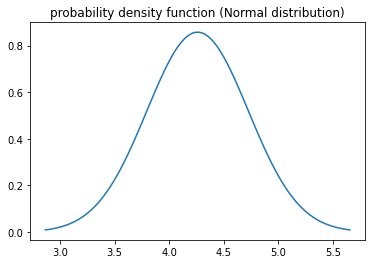

In [6]:
X_petal_length = []

for idx in range(len(x)):
    if y[idx] == 'Iris-versicolor':
        X_petal_length.append(x[idx][2])

mu = np.average(X_petal_length)
sigma = np.var(X_petal_length) ** 0.5

print('𝜇 is:', mu)
print('𝜎 is:', sigma)

plt.title('probability density function (Normal distribution)')
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

